In [17]:
%pip install pandas sqlalchemy pyodbc seaborn matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [14]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings


In [5]:
warnings.filterwarnings('ignore')
# Load configuration from JSON file
with open('C:/Users/Iheb/Desktop/Cours/Projects/config.json', 'r') as config_file:
    config = json.load(config_file)

# Fetching credentials from the configuration
server = config['server']
database = config['database']
username = config['username']
password = config['password']
driver = config['driver']

# Create a database connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&TrustServerCertificate=yes"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Example query
query = 'SELECT * FROM [Testing].[dbo].[marketing_data]'

# Execute the query and load data into a pandas DataFrame
df = pd.read_sql(query, engine)

In [6]:
df.info()
# Display the first few rows of the DataFrame
print(df.head())
# visualising if there are actually null values
df.isna().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,2236,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,2237,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,2238,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,166.95,225.715373,0.0,16.0,67.0,232.0,1725.0


In [21]:
# Remplacer les espaces dans les noms des colonnes
df.columns = df.columns.str.replace(' ', '')

# Assurer que la colonne 'Income' est de type string avant de remplacer les caractères
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False)

# Remplacer les virgules et convertir en float dans la colonne 'Income'
df['Income'] = df['Income'].str.replace(',', '', regex=False).astype(float)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,False,False,False,False,False,False,False,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,False,False,False,False,True,True,False,CA
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,False,False,False,False,False,False,False,CA
3,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,False,False,False,False,False,False,False,SA
4,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,False,False,False,False,False,False,False,SP


In [23]:
#Investigation sur les valeurs nulles
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

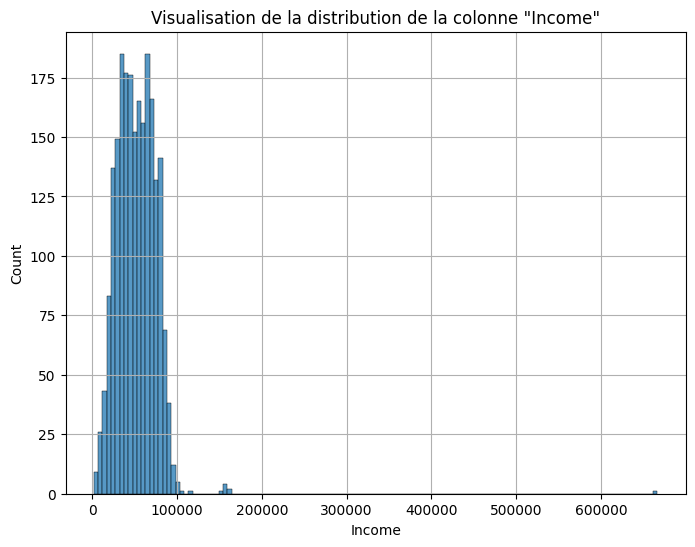

In [38]:
x=df['Income']
plt.figure(figsize =(8,6))
sns.histplot(x, kde=False)
plt.title('Visualisation de la distribution de la colonne "Income"')
plt.xlabel('Income')
plt.ylabel  ('Count')
plt.grid()

<Axes: >

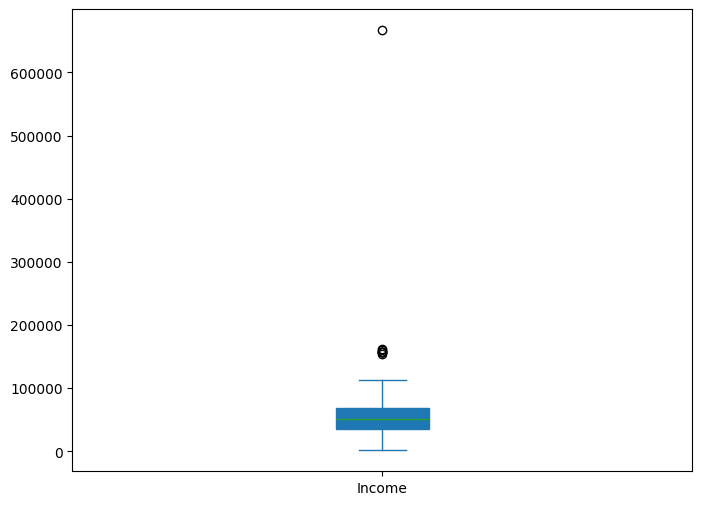

In [48]:
df['Income'].plot(kind='box', figsize=(8,6) ,patch_artist=True)

In [52]:
df['Income']=df['Income'].fillna(df['Income'].median)